In [189]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import sweetviz as sv
import phik

from autoviz.AutoViz_Class import AutoViz_Class
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import layers

In [190]:
# This dataset already has ID column, duplicates deleted as well as checked for NaNs 
# Levy "-"" values are corrected to 0
# Mileage is in numeric format
df = pd.read_csv('car_price_prediction.csv')
# drop mystic index column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [191]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Quick check for NaN values and duplicates.

Shape of your Data Set loaded: (18924, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number of Date Time Columns =  1
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    18 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix these data quality issues in the dataset, imp

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,19236.000000,Possible ID column: drop before modeling step.
Price,int64,0.000000,12,1.000000,26307500.000000,Column has 1055 outliers greater than upper bound (47161.00) or lower than lower bound(-19767.00). Cap them or remove them.
Levy,int64,0.000000,2,0.000000,11714.000000,Column has 160 outliers greater than upper bound (2292.50) or lower than lower bound(-1375.50). Cap them or remove them.
Manufacturer,object,0.000000,0,,,49 rare categories: Too many to list. Group them into a single category or drop the categories.
Model,object,0.000000,8,,,No issue
Prod. year,int64,0.000000,0,1939.000000,2020.000000,Possible date-time colum: transform before modeling step.
Category,object,0.000000,0,,,"3 rare categories: ['Pickup', 'Cabriolet', 'Limousine']. Group them into a single category or drop the categories."
Leather interior,object,0.000000,0,,,No issue
Fuel type,object,0.000000,0,,,"2 rare categories: ['Plug-in Hybrid', 'Hydrogen']. Group them into a single category or drop the categories."
Engine volume,object,0.000000,0,,,Possible high cardinality column with 107 unique values: Use hash encoding or text embedding to reduce dimension.


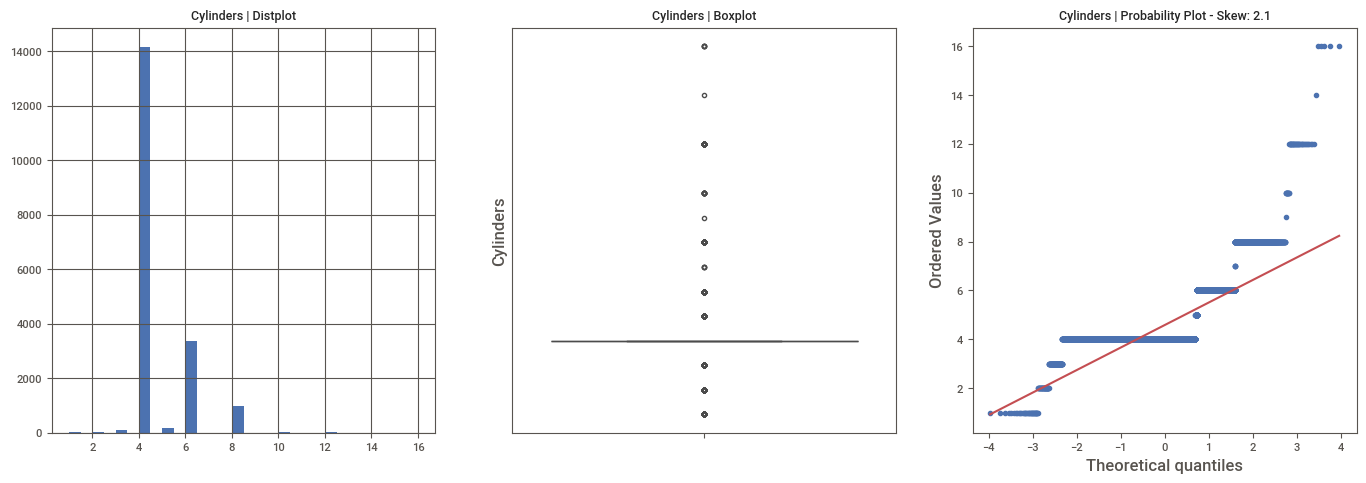

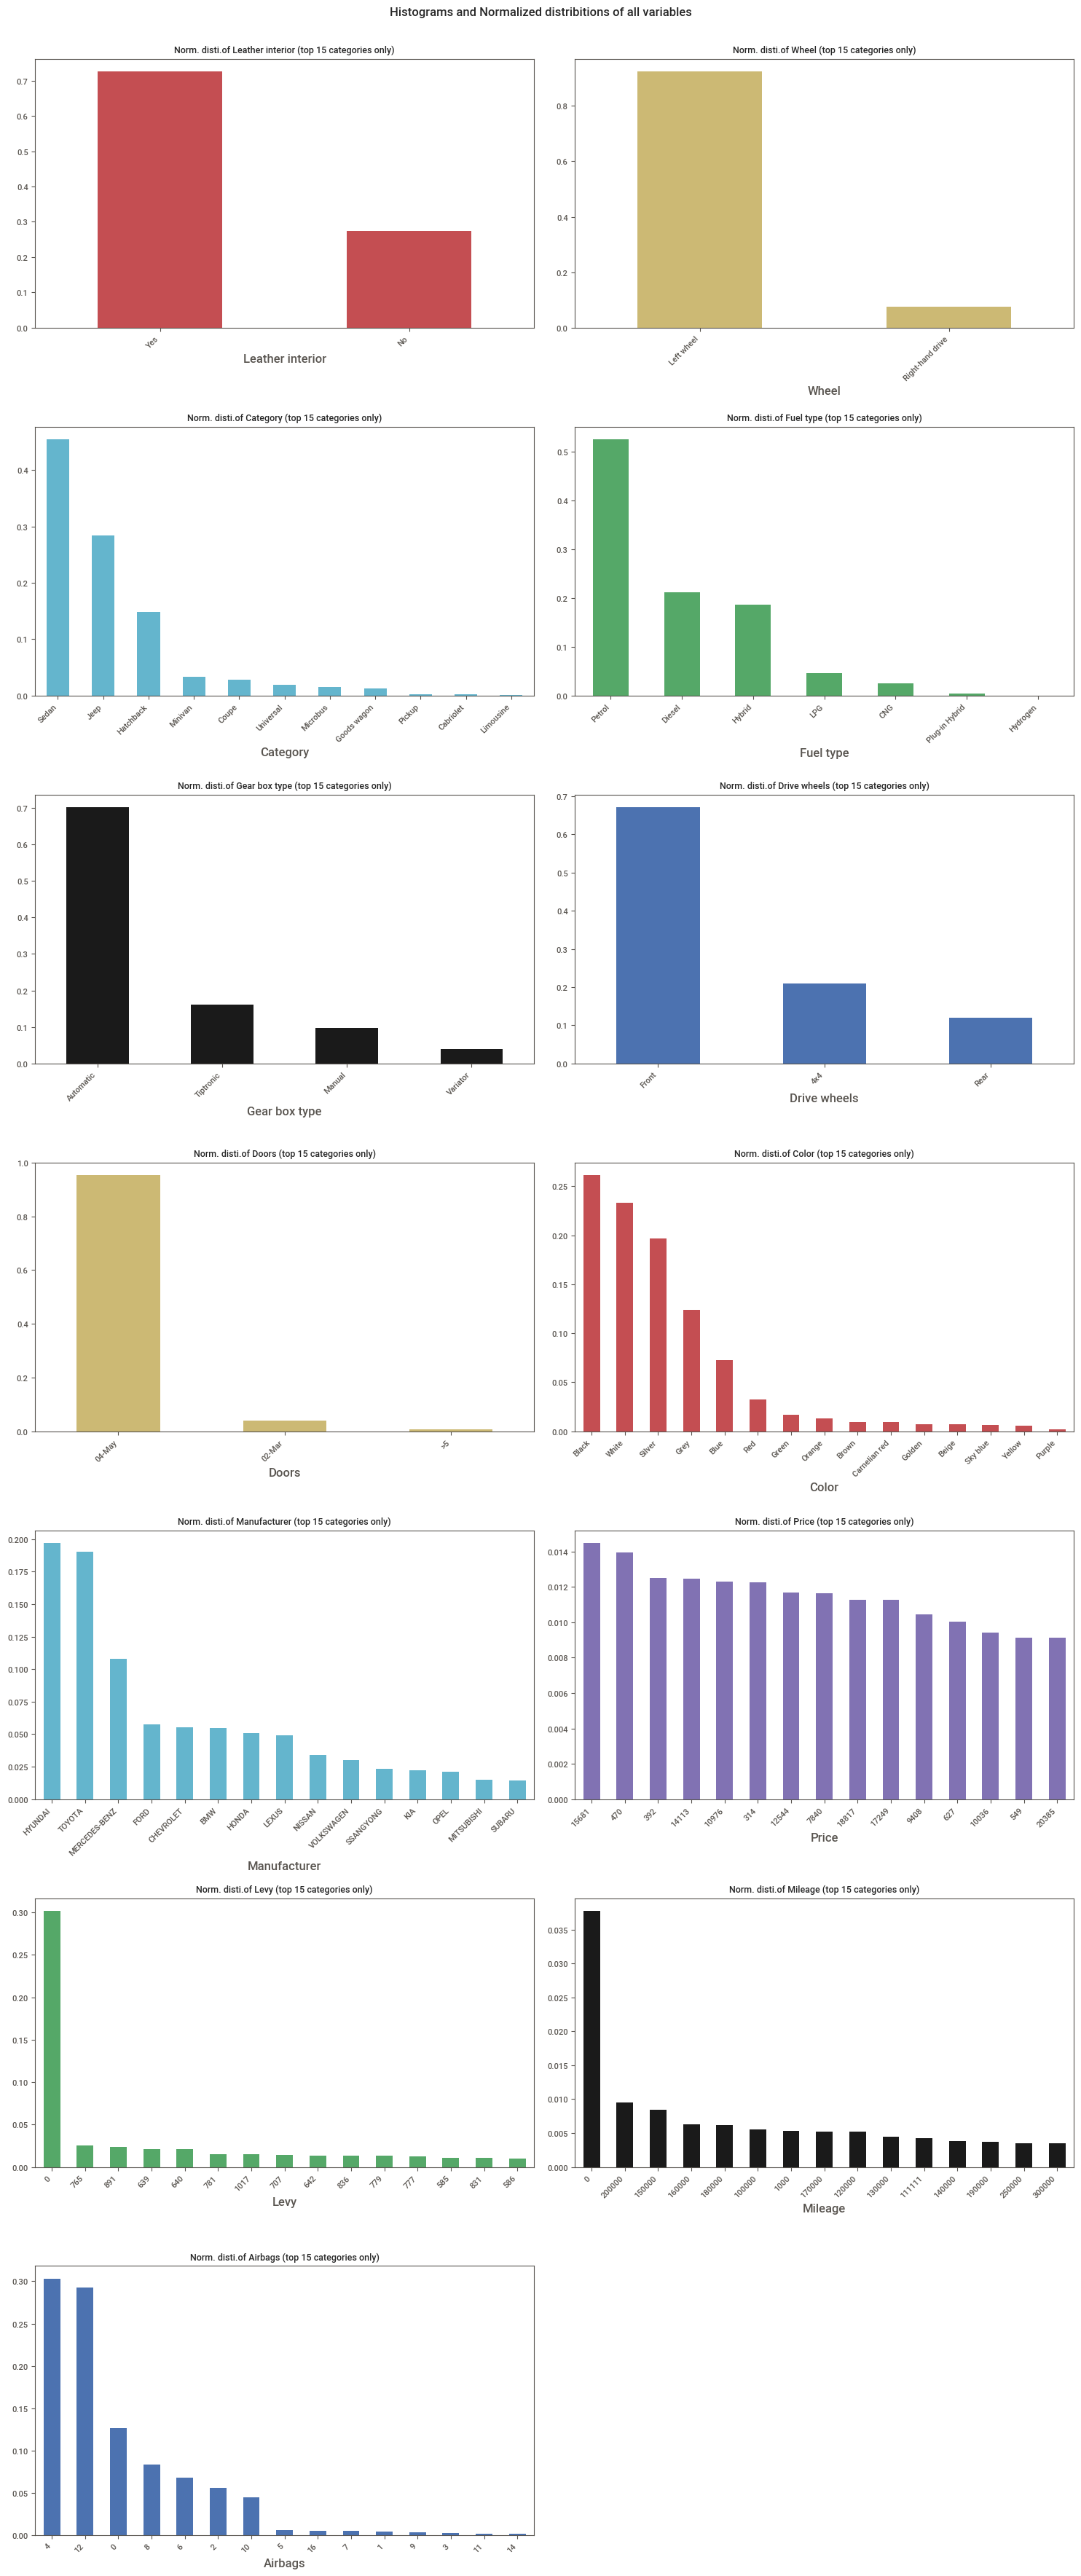

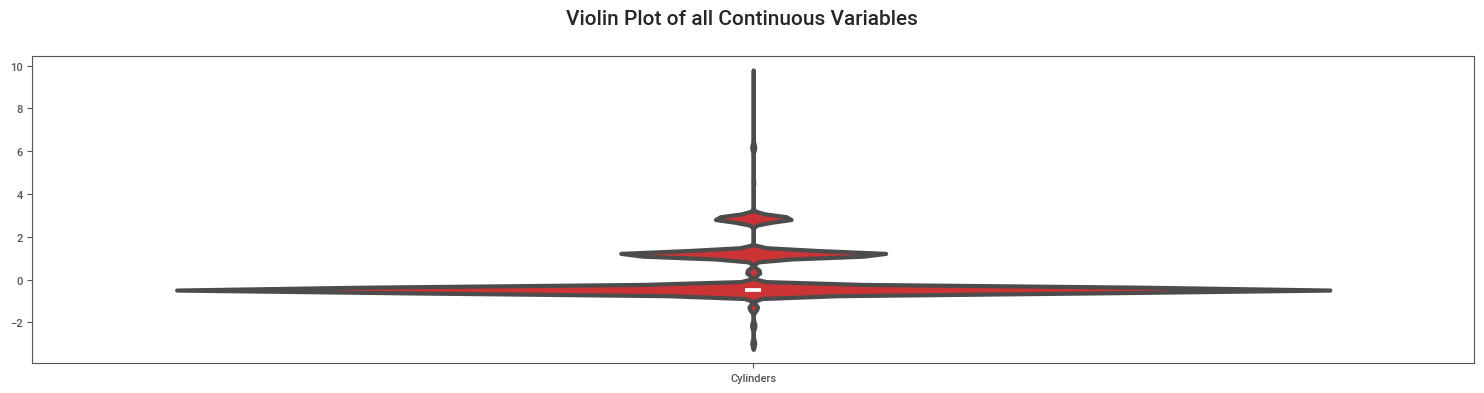

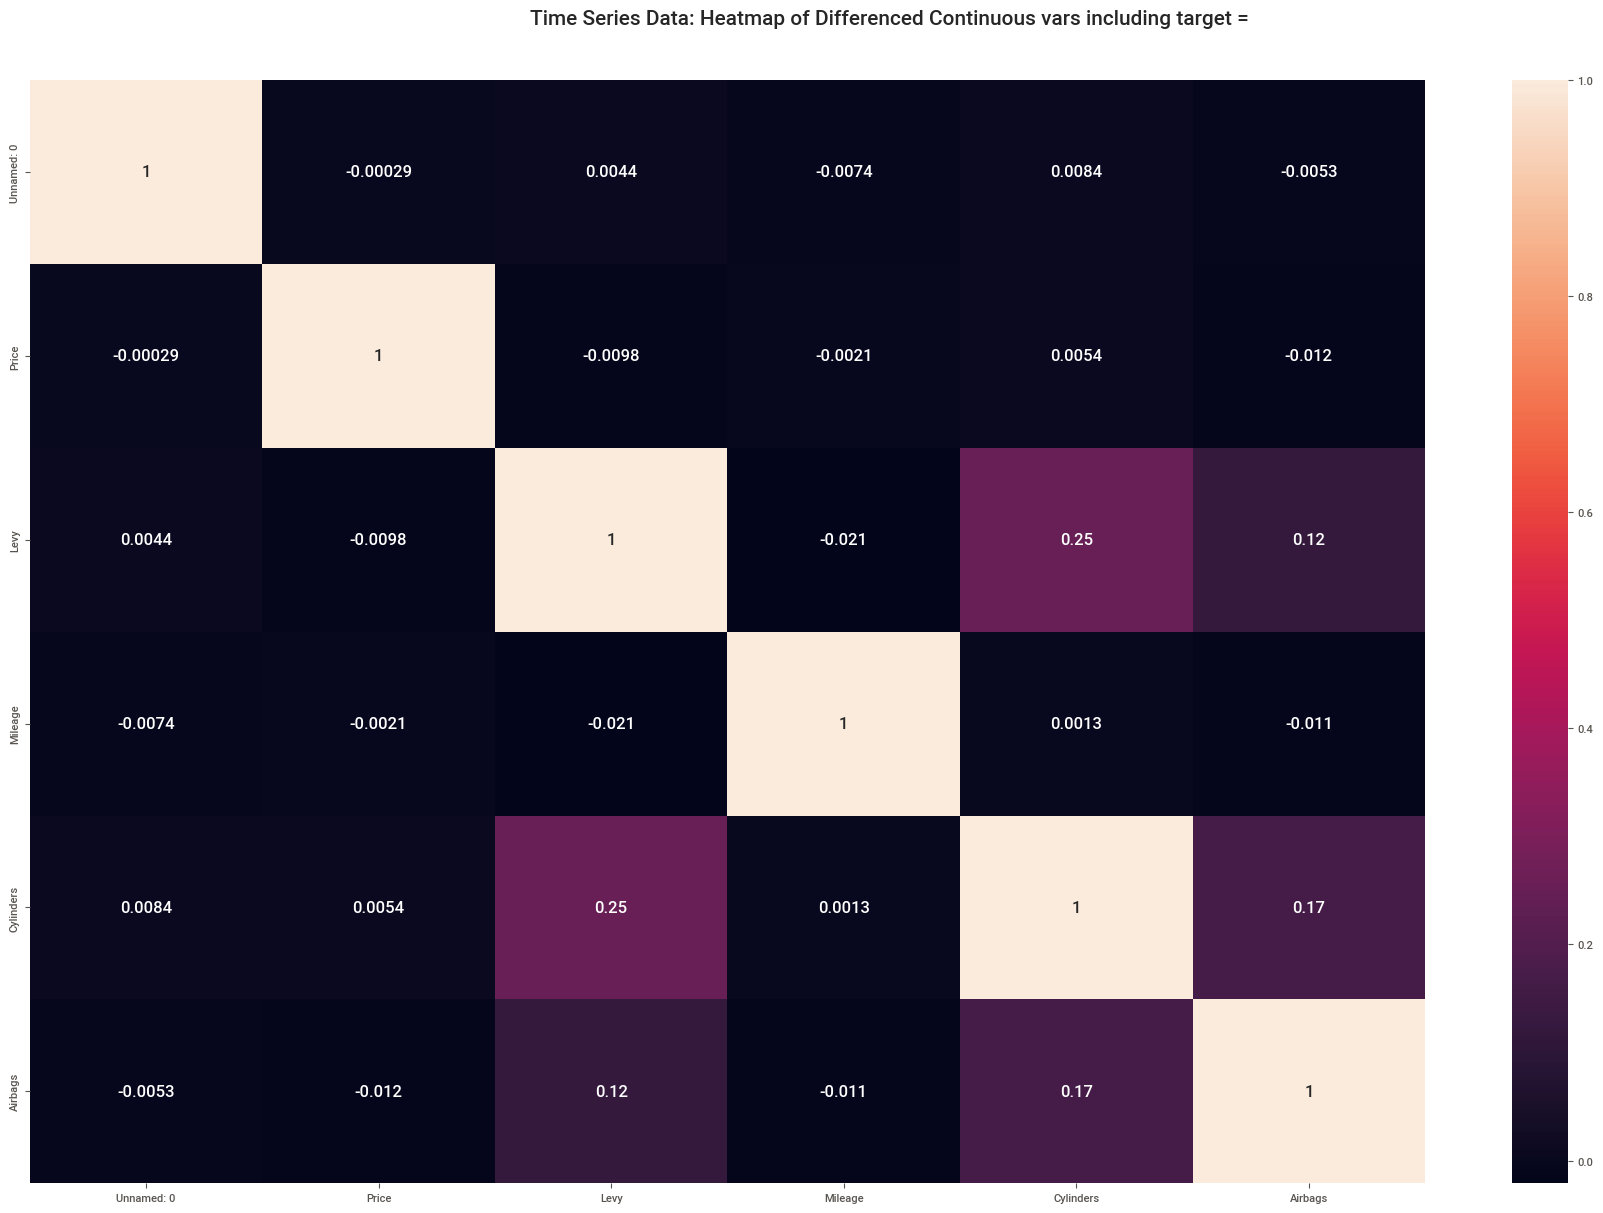

<Figure size 1500x0 with 0 Axes>

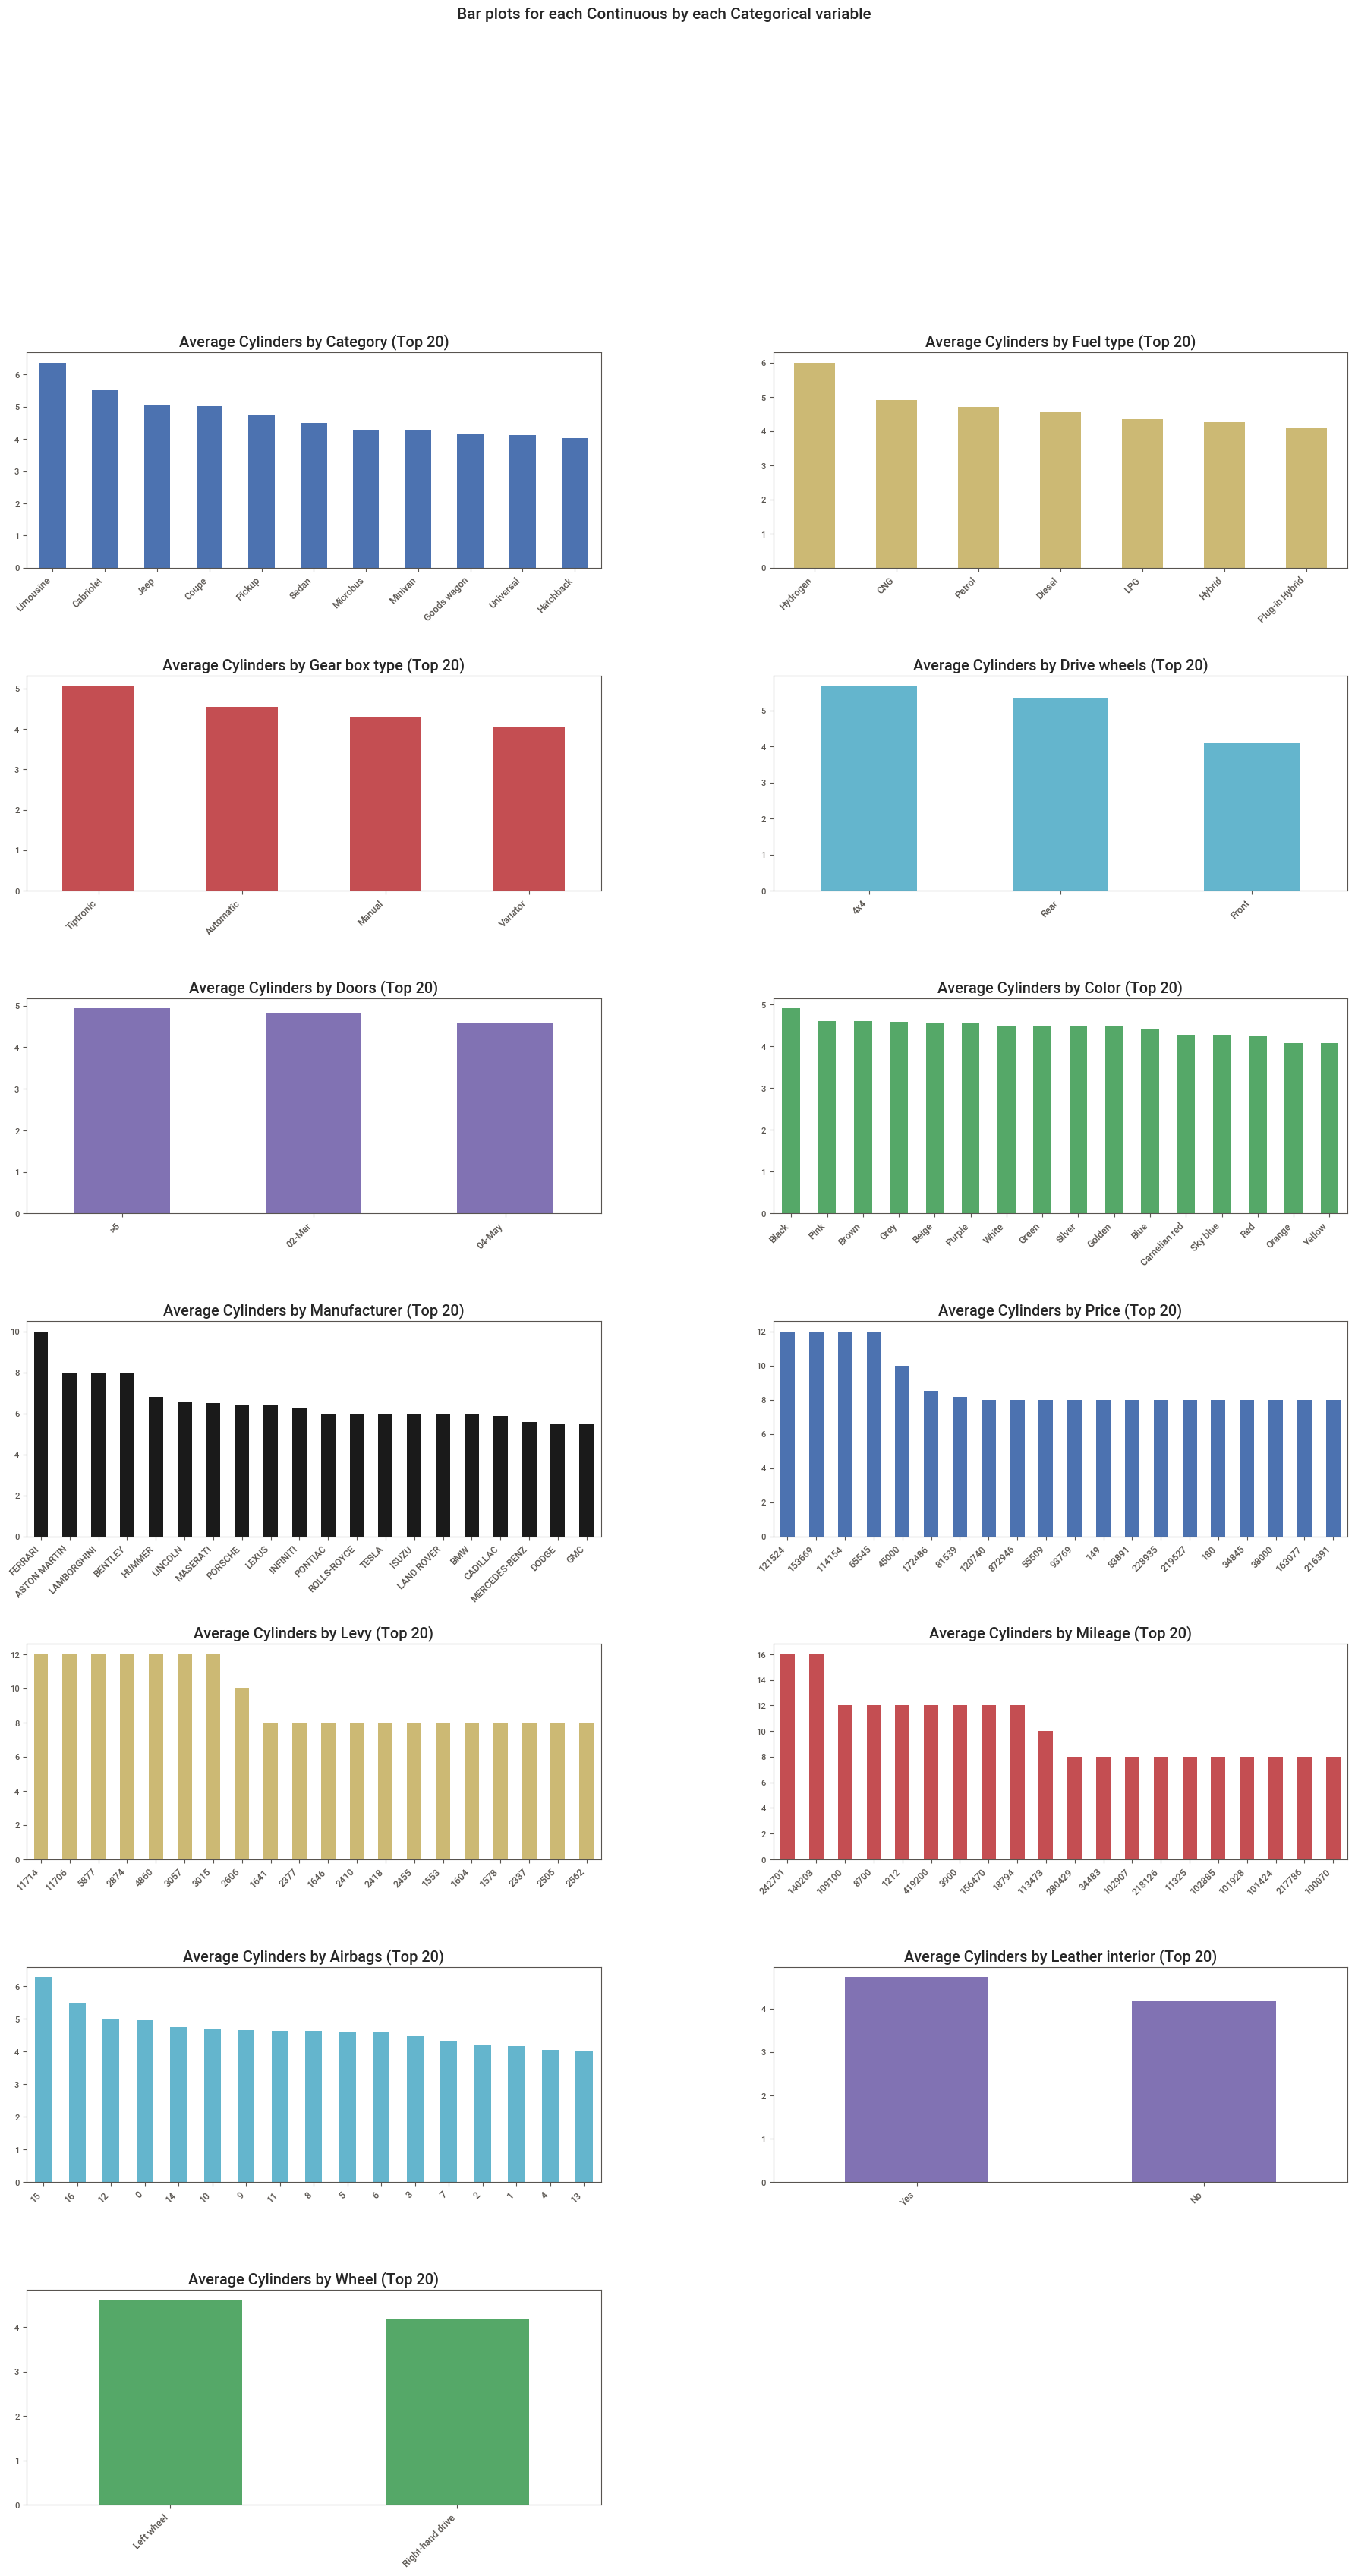

Could not draw wordcloud plot for Model. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Engine volume. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\ksobolev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\ksobolev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\ksobolev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\ksobolev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\ksobolev\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to

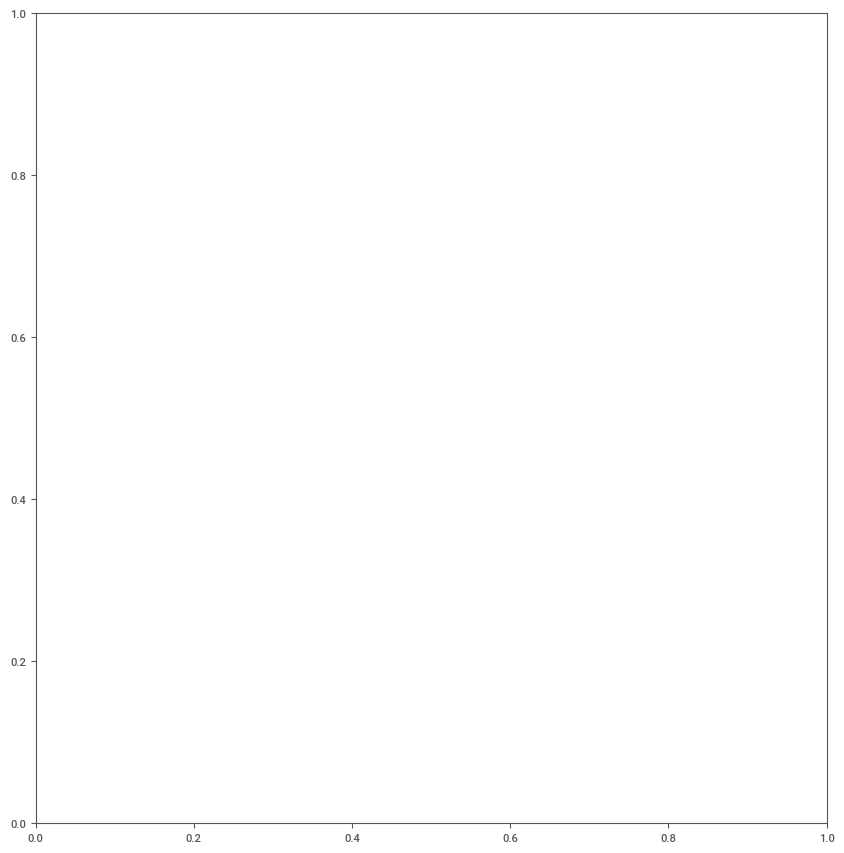

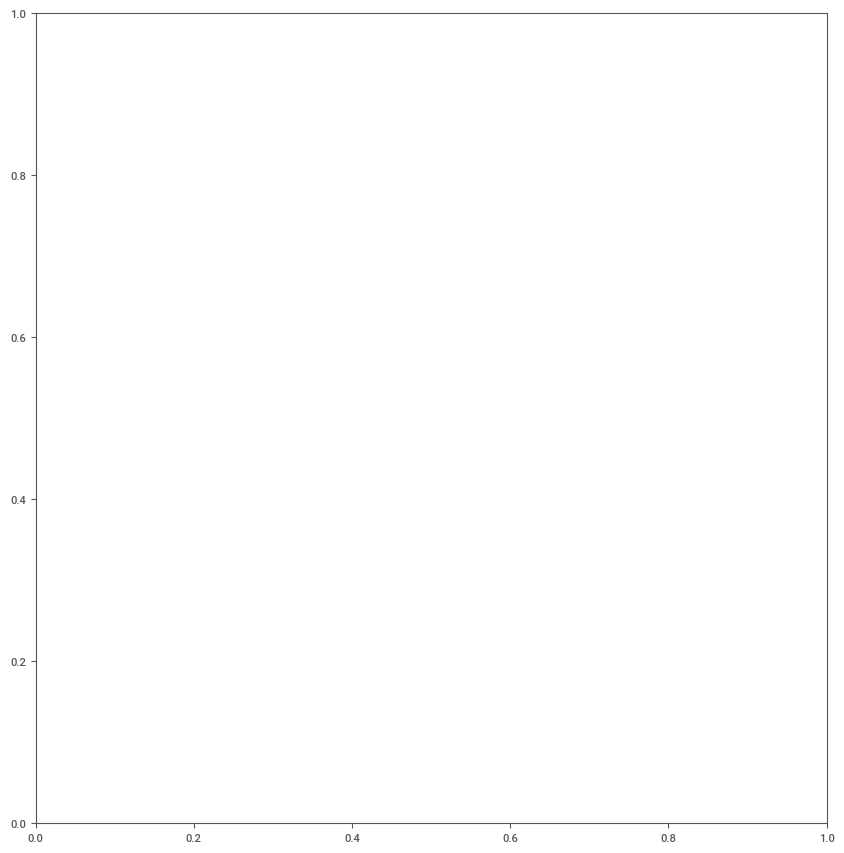

In [192]:
AV = AutoViz_Class()
report = AV.AutoViz("car_price_prediction.csv")
#report = AV.AutoViz("car_price_prediction.csv", chart_format="bokeh", depVar="price")

In every report as well as in AutoViz one of the main problem seems to be outliers. The minimal value is 1 and maximal is more than 25 million. 

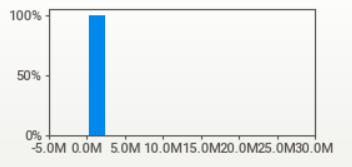

Since there is so much outliers and other noise that we can't even see any associations or anything in phik matrix or association matrxi.

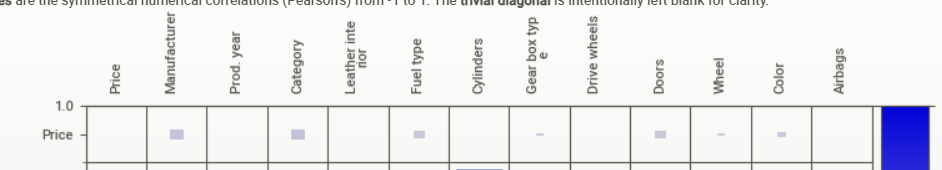

In [193]:
variable = "Price"

# Calculate Q1 and Q3, adjust for a more subtle outlier detection
Q1 = df[variable].quantile(0.15)
Q3 = df[variable].quantile(0.85)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
print(f"Detected outliers using IQR: {outliers.shape[0]}")
df.drop(outliers.index, inplace=True)


Detected outliers using IQR: 276


In [194]:
df["Price"].describe()

count    18648.000000
mean     15819.543436
std      14105.443657
min          1.000000
25%       5175.000000
50%      12858.000000
75%      21639.000000
max      73714.000000
Name: Price, dtype: float64

Now, taking a look back on the dataset, one can see that distributions of almost every variable are highly skewed to the right (so there distribution tends to be more on the left side).

Starting from the price, cheap cars are overwhelming. I have a theory, that cheap price might mean higher Levy. So it seems to be that it might be a good idea to combine levy and price, which makes sense if you think about levy as additional fee (it just increases the price).

<Axes: xlabel='Price', ylabel='Count'>

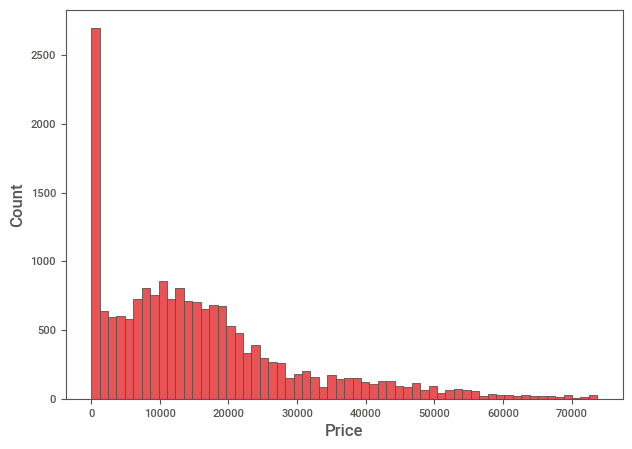

In [195]:
sns.histplot(data=df.Price)

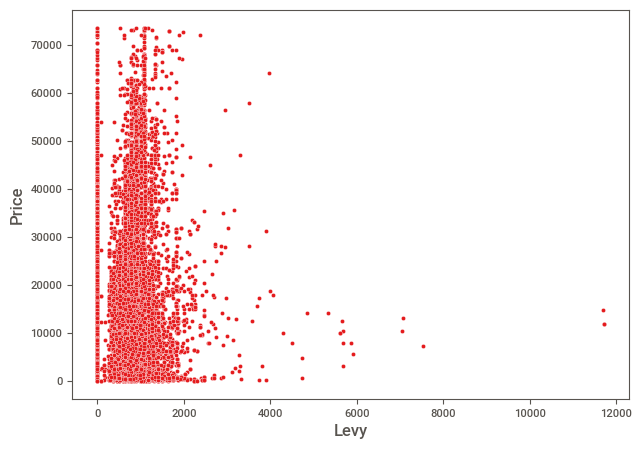

In [196]:
sns.scatterplot(x=df.Levy, y=df.Price, data=df)
plt.show()

Quite a lot of cheap cars have levy, let's try to combine them and see the distribution

<Axes: xlabel='price_levy_combined', ylabel='Count'>

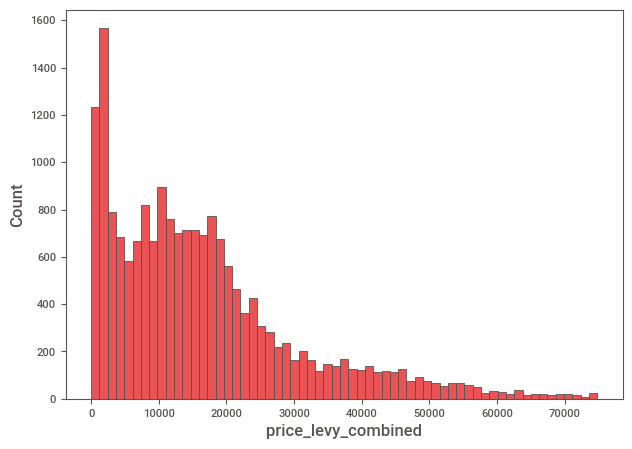

In [197]:
df['price_levy_combined'] = df["Price"] + df["Levy"]
sns.histplot(data=df.price_levy_combined)

In [198]:
df.price_levy_combined.describe()

count    18648.000000
mean     16450.774024
std      14138.253618
min          1.000000
25%       5663.000000
50%      13485.000000
75%      22125.000000
max      74809.000000
Name: price_levy_combined, dtype: float64

In [199]:
df.drop(["Price","Levy"], axis=1, inplace=True)

Now it's getting better, but there are still mystic cheap cars with a price of 1 dollar even combined with levy. I suggest to cut more outliers, especially from smaller quantiles. I would like to use isolation forest algorythm, but before that it is required to handle all categorical values.

In [200]:
# Generate the data profiling report, title is just 
report = ProfileReport(df, title='car price')
report.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<h1>Ydata report</h1>
Ydata profiling alerting these:

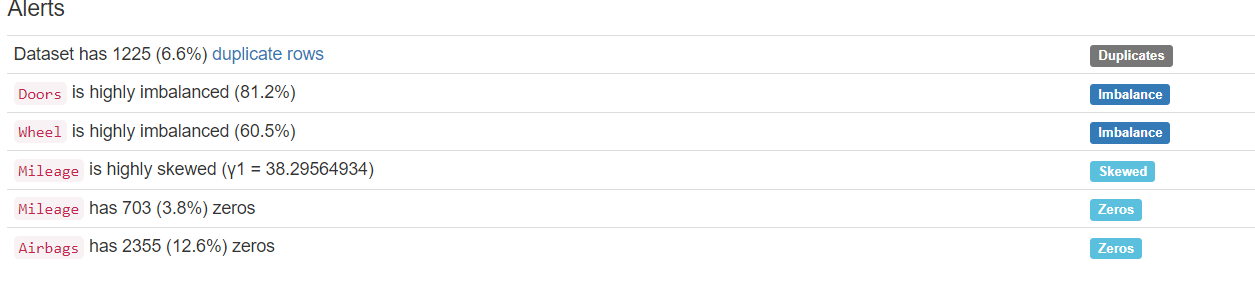
Hard to say where did the duplicates came from, but I suggest that in original dataset there were otherwise same cars but with different ID, so after removing ID column I need to delete duplicates again

In [201]:
df.drop_duplicates(inplace=True)

<h3>Doors</h3>

First of all it has wrong data format, I bet it supposed to be 2-3, 3-5 insted of date (second number stands for month)

Second problem is that basically column Category is dependent on doors amount. Every coupe or cabriolet has 2-3 doors, every sedan, universal or hatchback has 3-5 doors and etc. For me it seems like it only creating noise.

And the last problem is that it is super imbalanced.

I believe that it is possible to drop this column

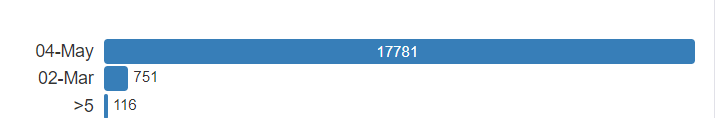

In [202]:
df.drop("Doors", axis=1, inplace=True)

<h3>Mileage</h3>
While it says that mileage is skewed, I think the more real problem is in outliers:

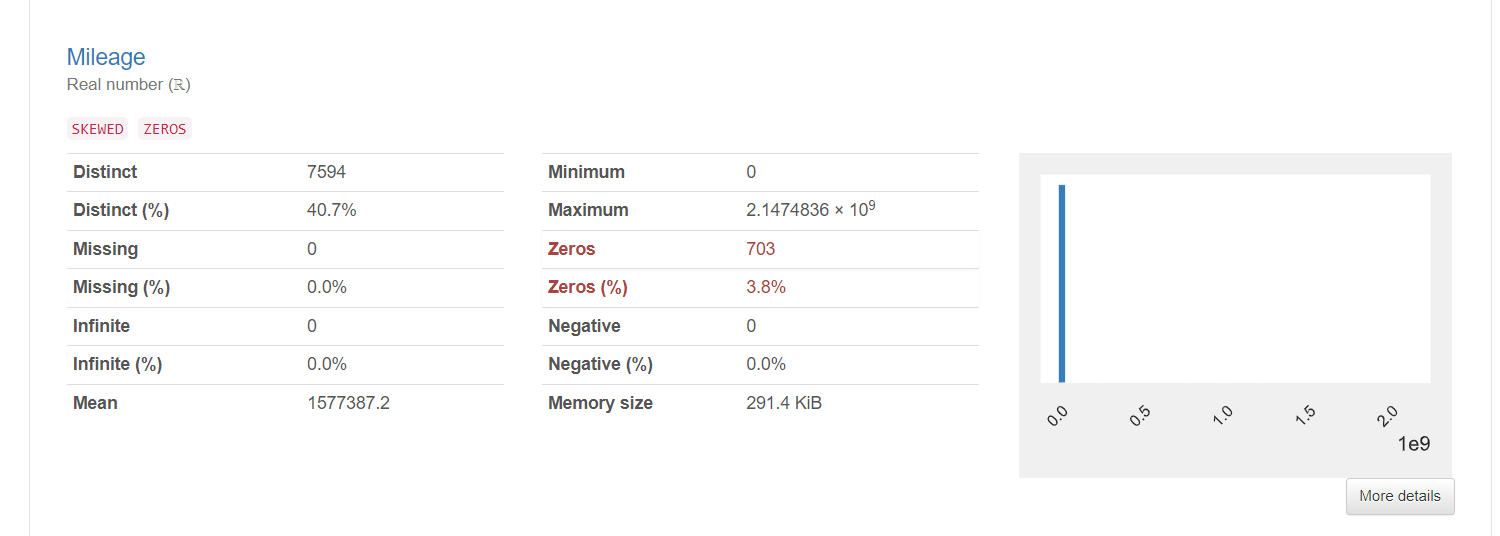
Brand new cars has 0 mileage, while some has more then 2 billions kilometers. Also extremely high values look suspisiously synthetic

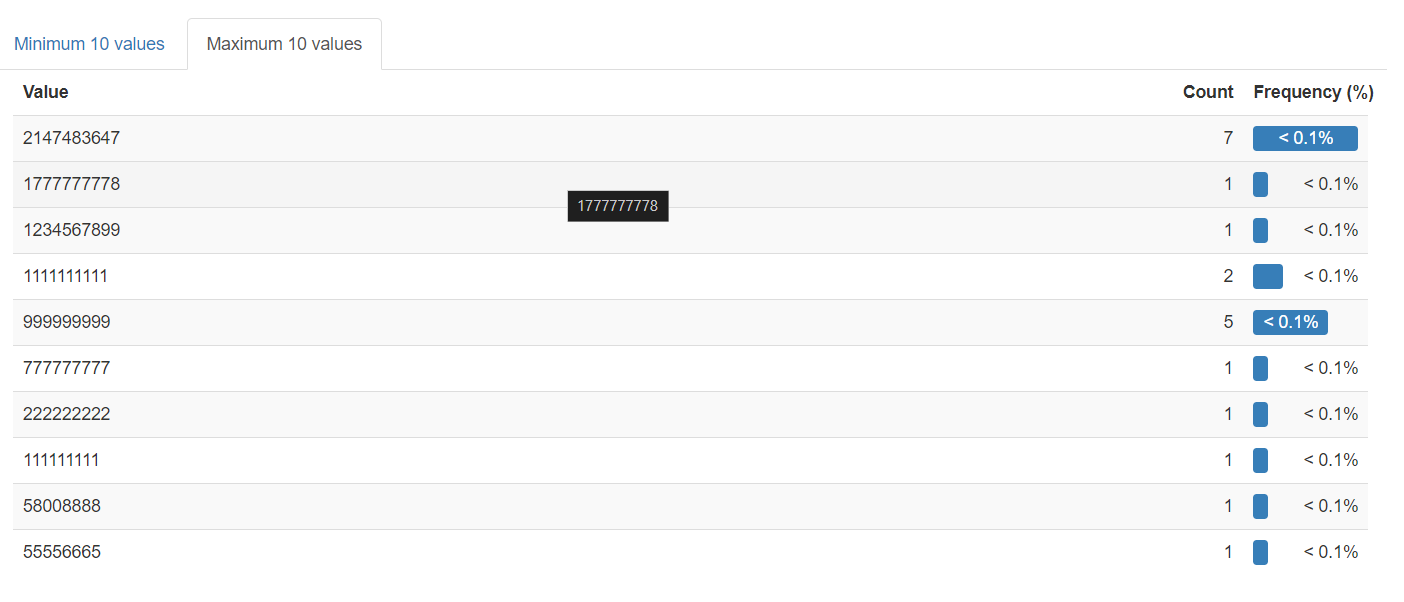

This needs to be cleared of outliers. I'll perform it later with isolation forest.

In [203]:
# TODO mileage outliers

<h3>Airbags</h3>
Distribution of airbags is not optimal, I believe joining them into the buckets might help.

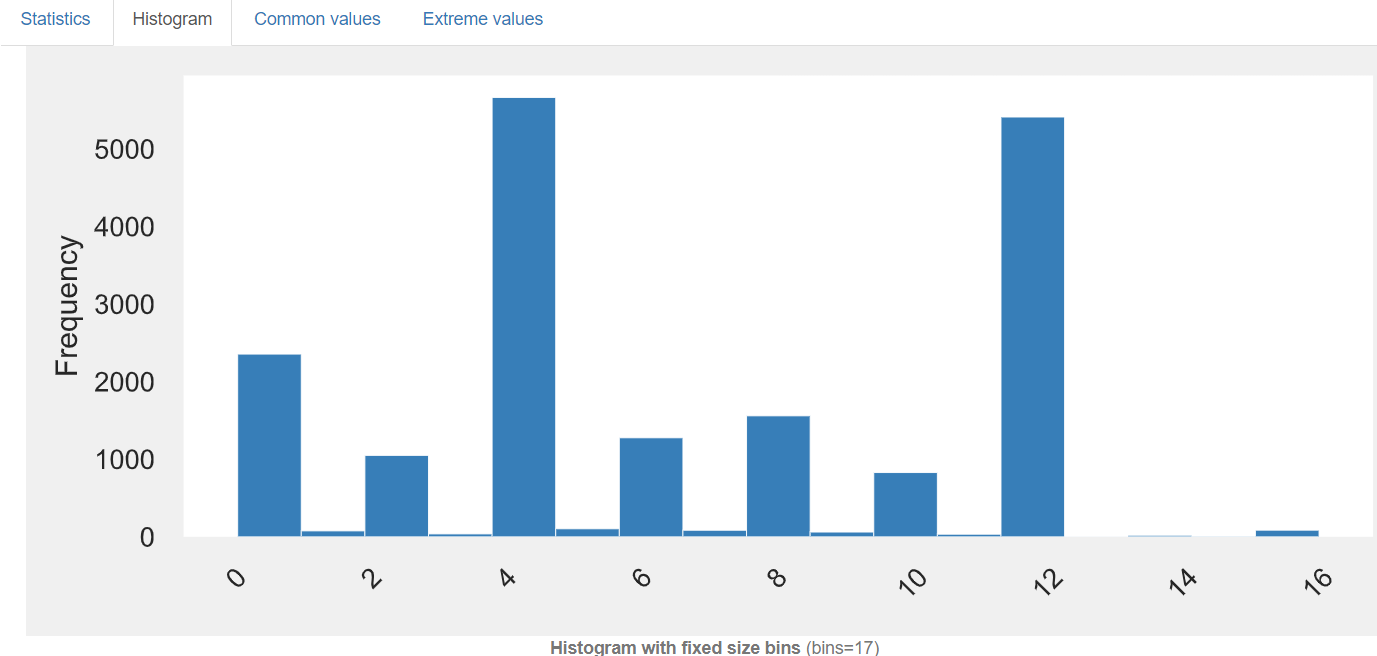

I suppose something like:


0-1 - has it's own bucket, because it means that there is 0 safety


2-6 - some of the safety for front seats and sometimes rear seats


7-12 - meaning good safety 


12+ - meaning safety overshoot (is it correct to call it like that?)

<Axes: xlabel='Airbags_bins', ylabel='Count'>

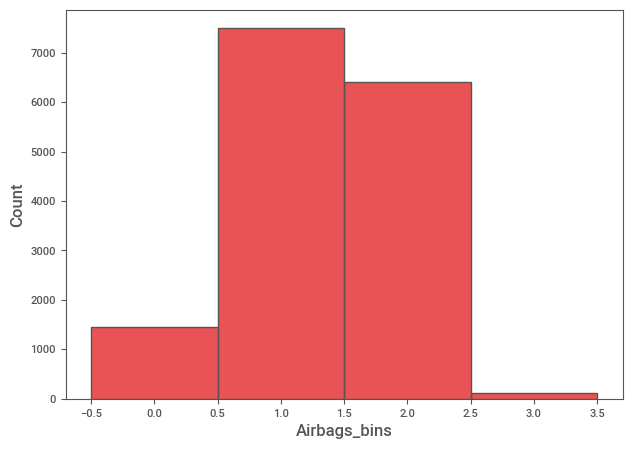

In [204]:
bins = [-1, 1, 6, 12, 16]
labels = [0 , 1, 2, 3]

df["Airbags_bins"] = pd.cut(df["Airbags"], bins=bins, labels=labels, right=True)

sns.histplot(data=df.Airbags_bins)

In [205]:
df.drop("Airbags", axis=1, inplace=True)

<h3>Wheel</h3>
Imbalanced, yes. Hard to say how to correct that, because right wheeled cars are dominant only in specific countries, such as UK or Japan. Rest of the market is for left sided cars.

Also I'm not sure how exactly wheel's side could affect the price.
May be it's easier to get rid of this column

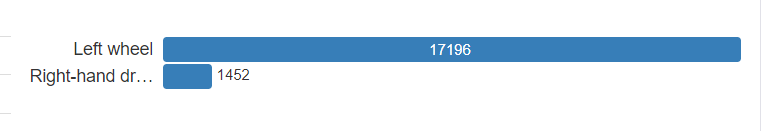

<h3>Engine volume</h3>
Engine volume consist of float number indicating volume and sometimes also mention if it is turbo or not. 

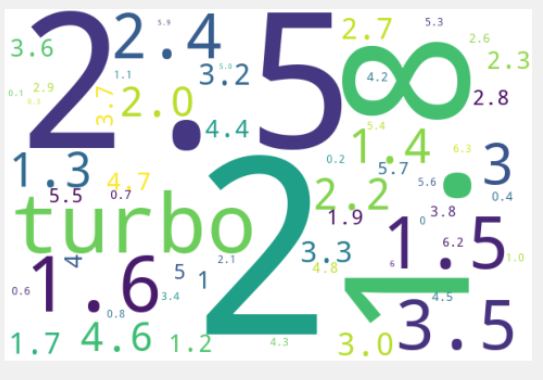

In [206]:
# separate number and Turbo
def process_engine(engine_value):
    # Extract the numeric part using regex
    # \d means any number between 0-9
    number = re.search(r'\d+\.\d+|\d+', engine_value)
    # save our extracted float
    number = float(number.group())

    # Check if "Turbo" is in the string
    turbo = 1 if "Turbo" in engine_value else 0

    return number, turbo

# Apply the function to the DataFrame
df[['Engine volume int', 'Turbo']] = df['Engine volume'].apply(lambda x: pd.Series(process_engine(x)))

# Drop the old Engine column
df.drop('Engine volume', axis=1, inplace=True)


<h1>Phik matrix</h1>

In [207]:
# Calculate the Phik correlation matrix
phik_matrix = df.phik_matrix()

# Display the correlation matrix
phik_matrix

interval columns not set, guessing: ['Prod. year', 'Mileage', 'Cylinders', 'price_levy_combined', 'Engine volume int', 'Turbo']


,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,price_levy_combined,Airbags_bins,Engine volume int,Turbo
Manufacturer,1.000000,0.999989,0.794376,0.685346,0.577180,0.670874,0.000000,0.574735,0.691634,0.851451,0.553901,0.357896,0.431772,0.531885,0.585847,0.454979
Model,0.999989,1.000000,0.945211,0.971641,0.791411,0.907335,0.000000,0.883476,0.859720,0.976780,0.882377,0.699939,0.716229,0.714798,0.922974,0.753769
Prod. year,0.794376,0.945211,1.000000,0.424726,0.446172,0.303045,0.141735,0.213023,0.493948,0.394729,0.297102,0.274846,0.443982,0.282779,0.169552,0.104498
Category,0.685346,0.971641,0.424726,1.000000,0.384362,0.476801,0.013448,0.226434,0.513795,0.609401,0.349106,0.238599,0.286746,0.230121,0.367566,0.306404
Leather interior,0.577180,0.791411,0.446172,0.384362,1.000000,0.184839,0.031961,0.256503,0.616385,0.029272,0.484799,0.242358,0.363182,0.191028,0.129709,0.124854
Fuel type,0.670874,0.907335,0.303045,0.476801,0.184839,1.000000,0.114021,0.159128,0.343704,0.256749,0.142355,0.355662,0.304670,0.315840,0.148113,0.234228
Mileage,0.000000,0.000000,0.141735,0.013448,0.031961,0.114021,1.000000,0.000000,0.037259,0.014015,0.019857,0.066908,0.000000,0.031109,0.000000,0.000000
Cylinders,0.574735,0.883476,0.213023,0.226434,0.256503,0.159128,0.000000,1.000000,0.264603,0.564378,0.202912,0.127802,0.174737,0.275110,0.836797,0.069844
Gear box type,0.691634,0.859720,0.493948,0.513795,0.616385,0.343704,0.037259,0.264603,1.000000,0.282359,0.304246,0.269622,0.291508,0.471506,0.180437,0.543491
Drive wheels,0.851451,0.976780,0.394729,0.609401,0.029272,0.256749,0.014015,0.564378,0.282359,1.000000,0.021195,0.189912,0.146842,0.182376,0.418407,0.145647


<h3>Model</h3>
Model is highly dependant on manufacturer, which makes sense because every manufacturer has own series of cars.
I believe it is some kind of generalizing variable, which collects almost everything else in this dataset.

For example all cars within same model name will almost everytime have same category, fuel type, engine volume range, cylinders, airbags and etc.

On the top of that, there are too much distinct values.

In [208]:
df.drop("Model", inplace=True, axis=1)

<h3>Color</h3>
Color has quite low impact on price, unless it is combination of rare car and rare color

In [209]:
df.drop("Color", inplace=True, axis=1)

<h3>Leather interioir<h3>

In [210]:
variable = 'Leather interior'

# NOTE: factorize can mix up the order of the values
values1, names1 = pd.factorize(df[variable], sort=False)
df[variable] = values1

<h3>Wheel</h3>
For now let's reorganize it to binary numerical category

In [211]:
variable = 'Wheel'

# NOTE: factorize can mix up the order of the values
values1, names1 = pd.factorize(df[variable], sort=False)
df[variable] = values1

In [212]:
# can process the whole dataset 
# and compares variables to each other instead
# of focusing on outliers on a single variable
from sklearn.ensemble import IsolationForest

# adjust the contamination rate as you see fit
# for example, if you expect 5% of the data to be outliers
# you can use 0.05 etc. 
iso = IsolationForest(contamination=0.075) 

# handle text variables, also I'm more interested in mileage and price outliers then in those
df_out = df.drop(['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels'], axis=1)

# fit isolation forest
y_pred = iso.fit_predict(df_out)

# filter outliers only
outliers = df_out[y_pred != 1]
df.drop(outliers.index, inplace=True)

After inspection with data wrangler I've found out that not all of the outliers I wanted to be caught are deleted.
Time to get hands dirty, I guess.

In [213]:
# There are few cars producted in 1950-s which has pretty strange price and mileage
df = df[df["Prod. year"] > 1980]

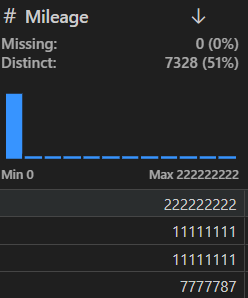

In [214]:
df = df[df["Mileage"] < 400000]

Hyundai with 20 L engine anyone?
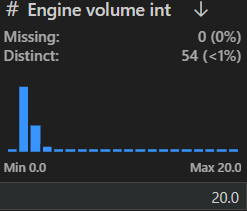

In [215]:
df = df[df["Engine volume int"] < 7]

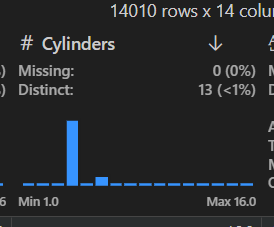

In [216]:
# Usual amount of cylinders is 4-8 I'd say.
# I can imagine a car with 3 cylinders, but not in 1 or 2. 
# In this dataset there quite new cars with 1 or 2 cylinders 
# As well as brand new sedans (not even good wagons) with 14 cylinders for 8000 dollars (levy included)
df = df[df["Cylinders"] > 3]
df = df[df["Cylinders"] < 9]


Now let's see the reports again

In [217]:
# Generate the data profiling report, title is just 
report = ProfileReport(df, title='car price')
report.to_file("ydata_after.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

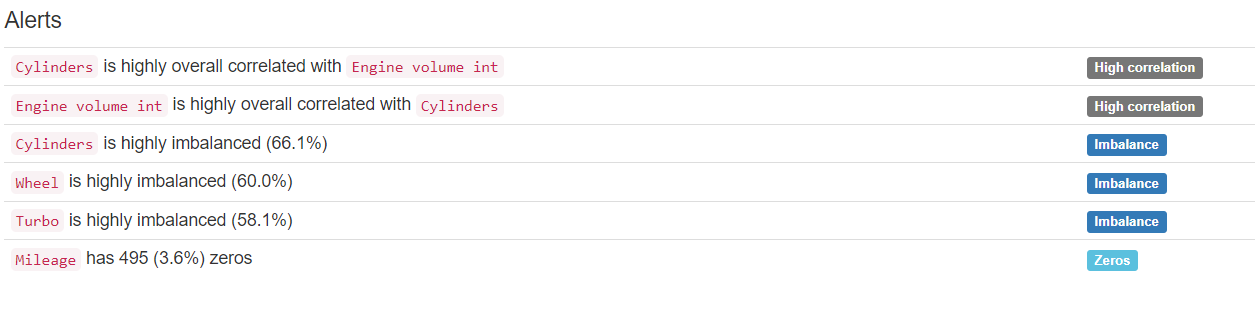

Correlation between cylinders andengine volume is quite understandable. Usually the more cylinders the more engine volume.

However I might consider deleting it as well. There is almost no correlation between cylinders and final price

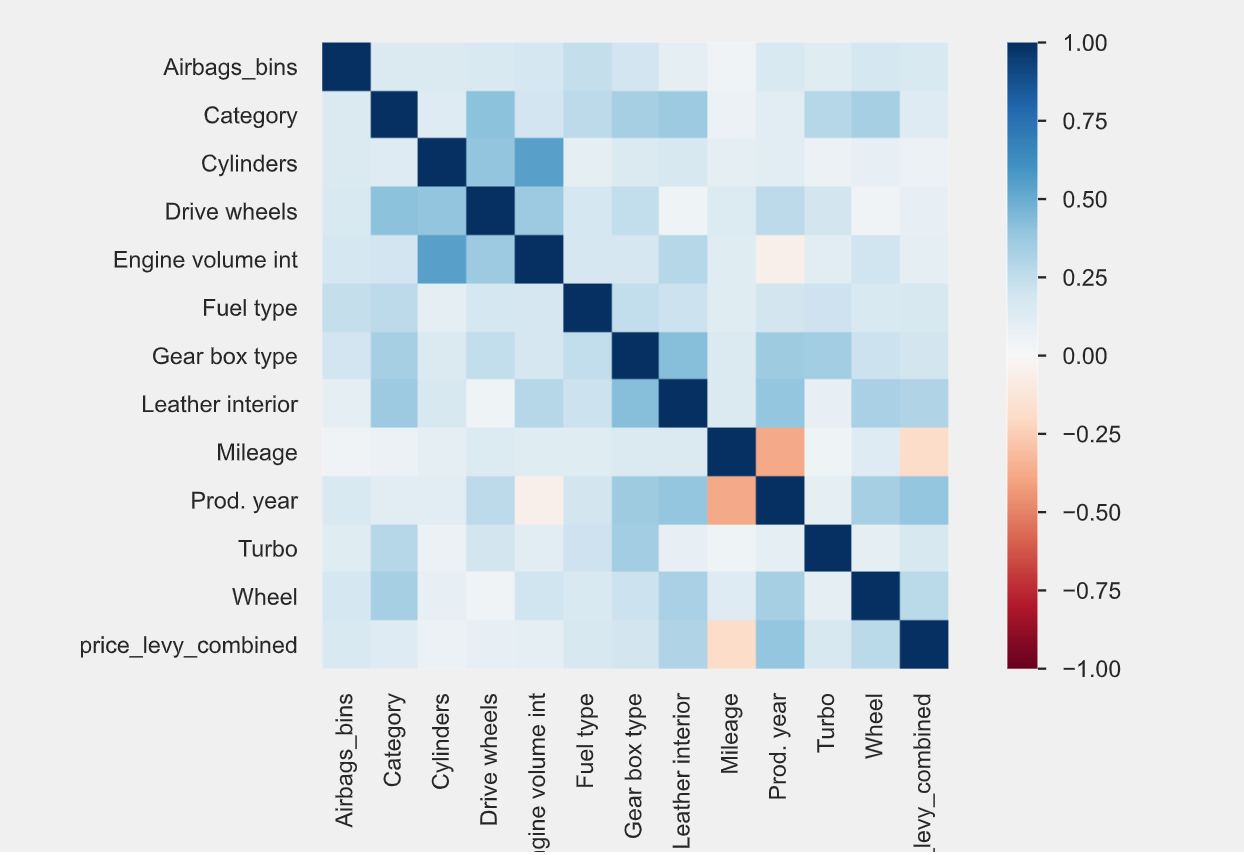

Another thing to consider is drive wheels. Correlation with price quite low and as we can see in next cells, it's might be overlapping with engine volume and car category.

In [218]:
# Again duplicates
df = df.drop_duplicates()

In [219]:
# Calculate the Phik correlation matrix
phik_matrix = df.phik_matrix()

# Display the correlation matrix
phik_matrix

interval columns not set, guessing: ['Prod. year', 'Leather interior', 'Mileage', 'Cylinders', 'Wheel', 'price_levy_combined', 'Engine volume int', 'Turbo']


,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,price_levy_combined,Airbags_bins,Engine volume int,Turbo
Manufacturer,1.000000,0.648424,0.645293,0.570377,0.653811,0.316971,0.618851,0.685866,0.844348,0.541555,0.433265,0.522313,0.680757,0.427758
Prod. year,0.648424,1.000000,0.262302,0.514535,0.348354,0.539445,0.216478,0.542313,0.386292,0.427191,0.557221,0.261471,0.263115,0.142452
Category,0.645293,0.262302,1.000000,0.385880,0.481622,0.144892,0.227090,0.509408,0.577468,0.356599,0.292833,0.231828,0.398520,0.302361
Leather interior,0.570377,0.514535,0.385880,1.000000,0.201461,0.195541,0.140080,0.618849,0.027826,0.496239,0.391541,0.156968,0.347127,0.092077
Fuel type,0.653811,0.348354,0.481622,0.201461,1.000000,0.239557,0.137756,0.345791,0.246196,0.141257,0.306522,0.332280,0.183105,0.195008
Mileage,0.316971,0.539445,0.144892,0.195541,0.239557,1.000000,0.198002,0.241523,0.220653,0.168984,0.338619,0.067692,0.204391,0.069029
Cylinders,0.618851,0.216478,0.227090,0.140080,0.137756,0.198002,1.000000,0.174600,0.454264,0.084598,0.128931,0.187125,0.895380,0.039601
Gear box type,0.685866,0.542313,0.509408,0.618849,0.345791,0.241523,0.174600,1.000000,0.256810,0.327879,0.299723,0.457178,0.273732,0.523721
Drive wheels,0.844348,0.386292,0.577468,0.027826,0.246196,0.220653,0.454264,0.256810,1.000000,0.031047,0.134736,0.171879,0.554109,0.116859
Wheel,0.541555,0.427191,0.356599,0.496239,0.141257,0.168984,0.084598,0.327879,0.031047,1.000000,0.350111,0.263884,0.453011,0.137613


In [220]:
# analyze and create HTML-report
report = sv.analyze(df)
report.show_html('sv_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


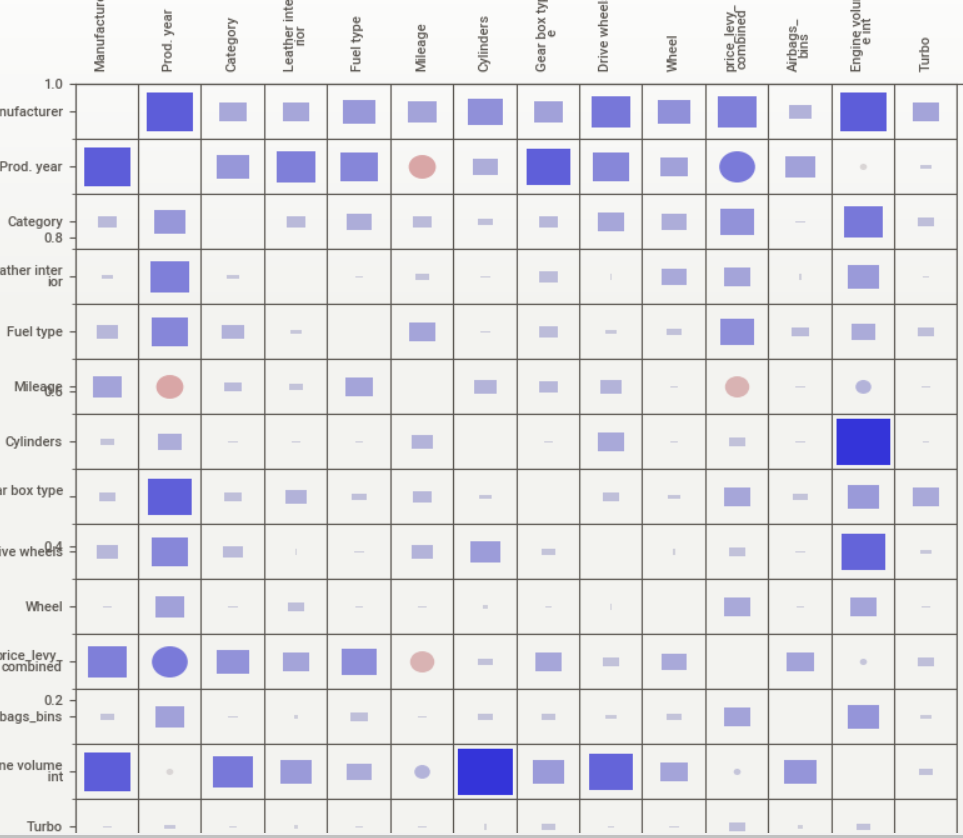

<h1>Text categorical variables</h1>

In [221]:
# Replace cabriolet to coupe
df["Category"].replace("Cabriolet", "Coupe", inplace=True)
# encode categorical column into seperate features
variable = 'Category'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)
# Drop limousine to decrease multidimensionality
df.drop("Limousine", axis=1, inplace=True)

In [222]:
# search for the index of the row with fuel type hydrogen
i = df[df["Fuel type"] == "Hydrogen"].index
# Drop the hydrogen
df.drop(i, inplace=True)

# join hybrids
df.replace("Plug-in Hybrid", "Hybrid", inplace=True)
# Encode column and drop CNG to decrease column amount
variable = 'Fuel type'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)
df.drop("CNG", axis=1, inplace=True)


In [223]:
# Encode column and drop last feature to decrease column amount
variable = 'Gear box type'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

df.drop("Tiptronic", axis=1, inplace=True)


In [224]:
# Encode column and drop last feature to decrease column amount
variable = 'Drive wheels'
dummies = pd.get_dummies(df[variable]).astype(int)
df = pd.concat([df, dummies], axis=1).drop(columns=variable)

df.drop("Rear", axis=1, inplace=True)

In [246]:
from sklearn.preprocessing import OneHotEncoder

variables = ["Manufacturer"]
encoder = OneHotEncoder(sparse_output=False, max_categories=10).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables])
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [247]:
X = df.drop("price_levy_combined", axis=1)
y = df["price_levy_combined"]

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
# VIF = Variance Inflation Factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  

# variables with high VIF-value 
# can mean multlicollinearity (variables providing same linear
# relationships in the data, potentially confusing the ML algorithm
# this might be good info when deciding if some variable needs to be removed
print(vif_data)

               feature                    VIF    
0                        Prod. year      2.200604
1                  Leather interior      1.661921
2                           Mileage      1.180426
3                         Cylinders      2.884378
4                             Wheel      1.531971
5                      Airbags_bins      1.328893
6                 Engine volume int      3.235655
7                             Turbo      1.406801
8                             Coupe    205.975182
9                       Goods wagon     95.516518
10                        Hatchback    988.067897
11                             Jeep   1335.190901
12                         Microbus     99.203896
13                          Minivan    225.261842
14                           Pickup     15.526380
15                            Sedan   1717.619724
16                        Universal    136.530470
17                           Diesel      8.119881
18                           Hybrid      7.688318
